# 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl

## 1)

In [2]:
data=pd.read_csv('BDOShoham.csv')

In [3]:
data

,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
0,1,6.30000,0.0250,0.001,0.00002,1000,1.8,0.07,0.0,0.051
1,1,4.00000,0.0400,0.001,0.00002,1000,1.8,0.07,0.0,0.051
2,1,6.30000,0.0400,0.001,0.00002,1000,1.8,0.07,0.0,0.051
3,1,4.00000,0.0630,0.001,0.00002,1000,1.8,0.07,0.0,0.051
4,1,6.30000,0.0630,0.001,0.00002,1000,1.8,0.07,0.0,0.051
...,...,...,...,...,...,...,...,...,...,...
5670,5,2.70096,15.8561,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5671,5,1.58784,15.8394,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5672,5,1.05338,16.0692,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5673,5,1.05397,25.7439,0.001,0.00002,1000,1.8,0.07,-80.0,0.025


In [4]:
data.describe()

,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
count,5675.000000,5675.000000,5675.000000,5.675000e+03,5.675000e+03,5675.0,5.675000e+03,5.675000e+03,5675.000000,5675.000000
mean,4.059912,0.899747,6.222612,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,2.727401,0.038657
std,1.379238,1.425159,8.699644,4.055273e-17,2.361736e-18,0.0,4.108187e-14,5.690394e-15,46.202822,0.012985
min,1.000000,0.001100,0.003720,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-90.000000,0.025000
25%,3.000000,0.016000,0.162055,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-10.000000,0.025000
50%,5.000000,0.250000,1.600000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,0.500000,0.051000
75%,5.000000,1.500000,10.000000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,20.000000,0.051000
max,7.000000,25.517000,42.956200,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,90.000000,0.051000


In [ ]:

print('Summary of X')
print()

print('Histograms:')
data.hist(figsize=(15, 15), bins=5)  
mpl.pyplot.show()

print('Box plots:')
data.plot(figsize=(15, 5), kind='box', subplots=True, sharex=False, sharey=False)
mpl.pyplot.show()

## 2,3)

In [6]:
# Import libraries

# First, let’s import all of the modules, functions and objects we are going to use in this tutorial.

# Pandas for data handling
import pandas # https://pandas.pydata.org/
from pandas.plotting import scatter_matrix

# pretty tables
from IPython.display import display

# NumPy for numerical computing
import numpy # https://numpy.org/

# MatPlotLib + Seaborn for visualization
import matplotlib.pyplot as pl  # https://matplotlib.org/
import seaborn as sns   # https://seaborn.pydata.org/

# assessment
from sklearn import model_selection # for model comparisons
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [7]:
y=data['FlowPattern']

In [8]:
X=data.loc[:, ['Vsl','Vsg', 'Ang']]

In [9]:
# Split data into training and testing datasets

test_pct = 0.20   # reserve 20% of the data points for testing performance
seed = 7          # setting the seed allows for repeatability
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_pct, random_state=seed)

In [10]:
models = []
models.append(('LR', LogisticRegression(multi_class='multinomial', class_weight=None, solver='lbfgs', max_iter=250)))
models.append(('kNN', KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', p=2)))
print('done \n')

done 



/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RESULTS FOR LR
Accuracy: 0.6581497797356828


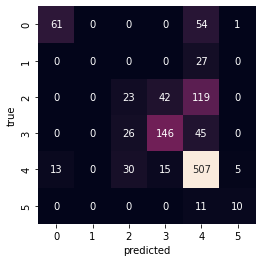

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 clasification report:
               precision    recall  f1-score   support

           1       0.82      0.53      0.64       116
           2       0.00      0.00      0.00        27
           3       0.29      0.12      0.17       184
           4       0.72      0.67      0.70       217
           5       0.66      0.89      0.76       570
           7       0.62      0.48      0.54        21

    accuracy                           0.66      1135
   macro avg       0.52      0.45      0.47      1135
weighted avg       0.61      0.66      0.62      1135

Cohen Kappa Score: 0.4395832060757844


RESULTS FOR kNN
Accuracy: 0.8405286343612335


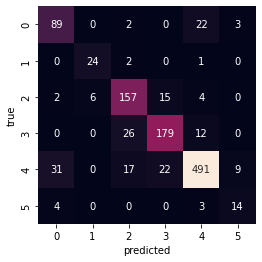


 clasification report:
               precision    recall  f1-score   support

           1       0.71      0.77      0.74       116
           2       0.80      0.89      0.84        27
           3       0.77      0.85      0.81       184
           4       0.83      0.82      0.83       217
           5       0.92      0.86      0.89       570
           7       0.54      0.67      0.60        21

    accuracy                           0.84      1135
   macro avg       0.76      0.81      0.78      1135
weighted avg       0.85      0.84      0.84      1135

Cohen Kappa Score: 0.7676166667609314




In [11]:
for name, modelName in models:   # Select each model in turn
    modelName.fit(X_train, y_train)  # train the model on the training data
    y_predicted = modelName.predict(X_test)  # make predictions using the validation data
    # What does the error look like?
    print('RESULTS FOR '+name)  
    print('Accuracy:', accuracy_score(y_test, y_predicted))
    sns.heatmap(confusion_matrix(y_test, y_predicted), square=True, annot=True, fmt='d', cbar=False)
    pl.xlabel('predicted')
    pl.ylabel('true');
    pl.show()
    print('\n clasification report:\n', classification_report(y_test, y_predicted))
    print('Cohen Kappa Score:', cohen_kappa_score(y_test, y_predicted))
    print('\n')

## 4)

In [12]:
models = []
models.append(('LR', LogisticRegression(multi_class='multinomial', class_weight="balanced", solver='lbfgs', max_iter=250)))
models.append(('kNN', KNeighborsClassifier(n_neighbors=10, weights='distance', algorithm='auto', p=2)))
print('done \n')

done 



RESULTS FOR LR
Accuracy: 0.533920704845815


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


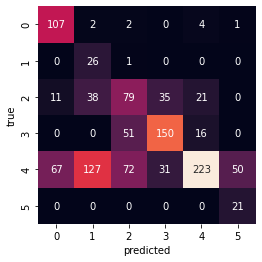


 clasification report:
               precision    recall  f1-score   support

           1       0.58      0.92      0.71       116
           2       0.13      0.96      0.24        27
           3       0.39      0.43      0.41       184
           4       0.69      0.69      0.69       217
           5       0.84      0.39      0.53       570
           7       0.29      1.00      0.45        21

    accuracy                           0.53      1135
   macro avg       0.49      0.73      0.51      1135
weighted avg       0.69      0.53      0.55      1135

Cohen Kappa Score: 0.414212123281657


RESULTS FOR kNN
Accuracy: 0.8493392070484581


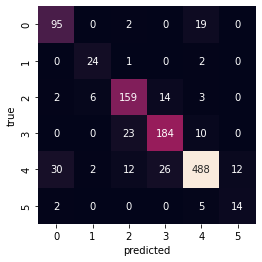


 clasification report:
               precision    recall  f1-score   support

           1       0.74      0.82      0.78       116
           2       0.75      0.89      0.81        27
           3       0.81      0.86      0.83       184
           4       0.82      0.85      0.83       217
           5       0.93      0.86      0.89       570
           7       0.54      0.67      0.60        21

    accuracy                           0.85      1135
   macro avg       0.76      0.82      0.79      1135
weighted avg       0.86      0.85      0.85      1135

Cohen Kappa Score: 0.7810919180469318




In [13]:
for name, modelName in models:   # Select each model in turn
    modelName.fit(X_train, y_train)  # train the model on the training data
    y_predicted = modelName.predict(X_test)  # make predictions using the validation data
    # What does the error look like?
    print('RESULTS FOR '+name)  
    print('Accuracy:', accuracy_score(y_test, y_predicted))
    sns.heatmap(confusion_matrix(y_test, y_predicted), square=True, annot=True, fmt='d', cbar=False)
    pl.xlabel('predicted')
    pl.ylabel('true');
    pl.show()
    print('\n clasification report:\n', classification_report(y_test, y_predicted))
    print('Cohen Kappa Score:', cohen_kappa_score(y_test, y_predicted))
    print('\n')

## 5)

for logistic regression the performance yeild the accuracy rate of 0.6581497797356828 when the weight is none which is higher than 0.533920704845815 when the weight is balance

for KNN, the better model is when K=10, weight is distance which yeild the accuracy rate of 0.8493392070484581. Althought the testing accuracy is higher, it is not as much higher because the model of K=5 with uniform weight yeild the accuracy rate of 0.8405286343612335